**Prediksi Jenis Jamur beracun dengan Klasifikasi Deep learning**

**Mengimport module**

In [ ]:
import numpy as np #Mengimport numpy
import pandas as pd #Mengimport pandas
import seaborn as sns #Mengimport seaborn
import matplotlib.pyplot as plt #Mengimport matplotlib
import plotly.graph_objects as go #Mengimport politly
import io #Menginmport io
from plotly.offline import plot, iplot, init_notebook_mode #Mengimport plot, iplot
from sklearn.preprocessing import StandardScaler #Mengimport standarscaler
from sklearn.model_selection import train_test_split #Mengimport split test train
import warnings #Mengimport warning
warnings.filterwarnings("ignore")

**Mengupload file**

In [ ]:
from google.colab import files #Mengimport files
uploaded = files.upload() #Mengupload dataset

Saving Jamur.csv to Jamur (2).csv


**Buka file**

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['Jamur.csv'])) #Membaca dataset
display(data) #Menampilkan dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


**Statistika deskriptif dari dataset**

In [ ]:
data.describe() #Melihat nilai statistika deskriptif dari tiap variabel di dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Cek missing value**

In [ ]:
data.isnull().sum() #Mengecek missing value pada dataset

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**Mengganti nilai dari tiap variabel dari singkatan menjadi kepanjangan**

In [ ]:
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"} 
data["cap-shape"]=data["cap-shape"].replace(values) #Mengganti value dari variabel cap-shape
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"} 
data["cap-surface"]=data["cap-surface"].replace(values2) #Mengganti value dari variabel cap-surface
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"} 
data["cap-color"]=data["cap-color"].replace(values3) #Mengganti value dari variabel cap-color
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"} 
data["odor"]=data["odor"].replace(values4) #Mengganti value dari variabel odor
values5={"a":"attached","f":"free"} 
data["gill-attachment"]=data["gill-attachment"].replace(values5) #Mengganti value dari variabel gill-attachment
values6={"c":"close","w":"crowded"} 
data["gill-spacing"]=data["gill-spacing"].replace(values6) #Mengganti value dari variabel gill-spacing
values7={"b":"broad","n":"narrow"} 
data["gill-size"]=data["gill-size"].replace(values7) #Mengganti value dari variabel gill-size
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"} 
data["gill-color"]=data["gill-color"].replace(values8) #Mengganti value dari variabel gill-color
values9={"t":"tapering","e":"enlarging"} 
data["stalk-shape"]=data["stalk-shape"].replace(values9) #Mengganti value dari variabel stalk-shape
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"} 
data["stalk-root"]=data["stalk-root"].replace(values10) #Mengganti value dari variabel stalk-root
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"} 
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(values11) #Mengganti value dari variabel stalk-surface-above-ring
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(values11) #Mengganti value dari variabel stalk-surface-below-ring
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(values12) #Mengganti value dari variabel stalk-surface-above-ring
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(values12) #Mengganti value dari variabel stalk-surface-below-ring
veil_type={"p":"partial","u":"universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type) #Mengganti value dari variable veil-type
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil-color"]=data["veil-color"].replace(veil_color) #Mengganti value dari variabel veil-color
ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number) #Mengganti value dari variabel ring-number
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type) #Mengganti value dari variabel ring-type
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color) #Mengganti value dari variabel spore-print-color
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population) #Mengganti value dari variabel population
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat) #Mengganti value dari variabel habitat
bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises) #Mengganti value dari variabel bruises
values13={"p":"poisonous","e":"edible"}
data["class"]=data["class"].replace(values13) #Mengganti value dari variabel class

**Menampilkan dataset yang nilai variabel nya telah diganti**

In [ ]:
display(data) #Menampilkan dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


**Melakukan label encoder**

In [ ]:
df = data.copy() #Membuat salinan dataset

from sklearn.preprocessing import LabelEncoder #Mengimport label encoder
labelencoder=LabelEncoder() #labelencoder
for column in df.columns: #for loop
    df[column] = labelencoder.fit_transform(df[column]) #Melakukan label encoder

display(df) #Menampilan salinan dataset yang telah di encoder

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,3,4,4,0,1,1,4,2,1,1
8120,0,2,3,0,1,6,0,0,0,11,...,3,4,4,0,0,1,4,2,4,1
8121,0,3,3,0,1,6,0,0,0,1,...,3,4,4,0,1,1,4,2,1,1
8122,1,4,2,0,1,3,1,0,1,2,...,2,7,7,0,2,1,0,7,4,1


**Membuat heat map/correlation matrix**

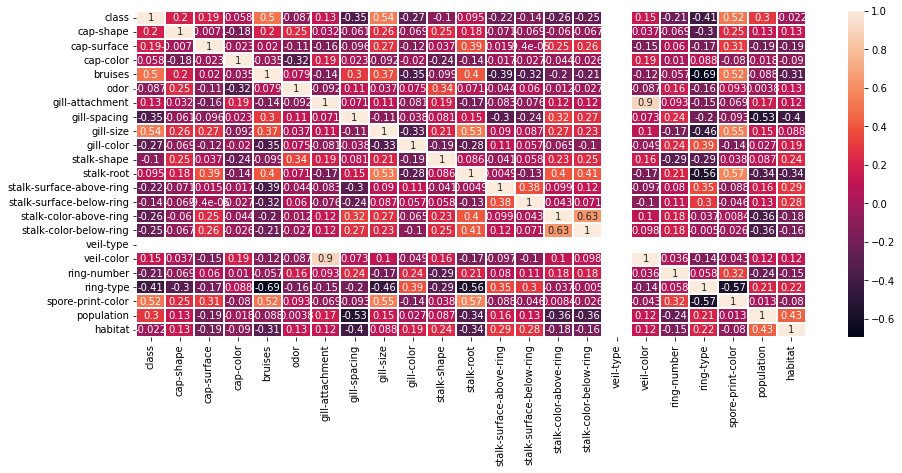

In [ ]:
heatmap=df.corr() #heatmap
ax= plt.figure(figsize=(15,6)) #ukuran heatmap
sns.heatmap(heatmap,linewidths=1,linecolor='white',annot=True) #membuat dan menampilkan heatmap

**Membuat grafik antara status jamur beracun dengan spore print color**

In [ ]:
fig = {
  "data": [
    {
      "values": [1744,1648,576,48,48,48,48,48],
      "labels": ['Brown','Black','White','Orange',"Purple","Chocolate","Yellow","Buff"],
      "domain": {"column": 0},
      "name": "Edible Mushrooms",
      "hoverinfo":"label+percent+name",
      "type": "pie",
         "hole": .4,
        'marker': {'colors': ['brown', 'black', 'white', 'orange',"purple","sienna","yellow","peru"],
                  "line":{"color":'#000000',"width":2}}
    },
    {
      "values": [1812,1584,224,224,72],
      "labels": ["White","Chocolate","Brown","Black","Green"],   
      "domain": {"column": 1},
      "name": "Poisonous Mushrooms",
      "hoverinfo":"label+percent+name",
         "hole": .4,
      "type": "pie",
        "marker": {"colors":["white","sienna","brown","black","green"],
                  "line":{"color":'#000000',"width":2}}

    }],
  "layout": {
      
        "title":"Edible and Poisonous Mushrooms Spore Print Color Percentages",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Edible",
                "x": 0.20,
                "y": 1.05
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Poisonous",
                "x": 0.85,
                "y": 1.05
            }
        ]
    }
}
iplot(fig)

**Membuat grafik status jamur beracun dengan gill-size**

In [ ]:
from plotly import tools
edible=data[data["class"]=="edible"]
poisonous=data[data["class"]=="poisonous"]
gill_size_edible=pd.DataFrame(edible["gill-size"].value_counts())
gill_size_poisonous=pd.DataFrame(poisonous["gill-size"].value_counts())

trace = go.Scatter(
    x = gill_size_edible.index,
    y = gill_size_edible["gill-size"],
    mode = 'markers',
    name = 'Edible',
    marker= dict(size= 14,
                    line= dict(width=1),
                    color= "cadetblue",
                    opacity= 0.7
                   )
)
trace2 = go.Scatter(
    x = gill_size_poisonous.index,
    y = gill_size_poisonous["gill-size"],
    mode = 'markers',
    name = 'Poisonous',
       marker= dict(size= 14,
                    line= dict(width=1),
                    color= "firebrick",
                    opacity= 0.7,
                   symbol=220
                   )
)

fig = tools.make_subplots(rows=1, cols=1)



fig.append_trace(trace, 1, 1)
fig.append_trace(trace2, 1, 1)

fig['layout'].update(showlegend=False,height=800, width=800, title='Gill Size' ,paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="moccasin")
iplot(fig)

**Membuat grafik antara status jamur beracun dengan bruises**

In [ ]:
data_b = [
  go.Histogram(
    histfunc = "count",
    x = edible["bruises"], 
    name = "edible",
    marker=dict(color="lightgreen",line=dict(color='darkgreen', width=5))
  ),
  go.Histogram(
    histfunc = "count",
    x = poisonous["bruises"],
    name = "poisonous",
    marker=dict(color="mistyrose",line=dict(color='maroon', width=5)),
    opacity=0.75
  )
]

layout = go.Layout(
    title='Bruises Counts with Mushroom Type',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=data_b, layout=layout)
iplot(fig)

**Menampilkan dataset yang sudah di proses label-encoder**

In [ ]:
display(df) #Menampilkan dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,3,4,4,0,1,1,4,2,1,1
8120,0,2,3,0,1,6,0,0,0,11,...,3,4,4,0,0,1,4,2,4,1
8121,0,3,3,0,1,6,0,0,0,1,...,3,4,4,0,1,1,4,2,1,1
8122,1,4,2,0,1,3,1,0,1,2,...,2,7,7,0,2,1,0,7,4,1


**Membuat dataset yang berisi variabel target**

In [ ]:
df_c = df[['class']] #Membuat dataset yang berisi variabel target
display(df_c) #Menampilkan dataset

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


**One-hot encoder/membuat data dummy untuk variabel prediktor**

In [ ]:
cat_var = ['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',	'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
df_cat = df[cat_var] #Membaut dataset prediktor
df_cat = pd.get_dummies(df_cat,columns=cat_var) #Melakukan one-hot encoder
df = pd.concat([df_c,df_cat],axis=1) #Menggabungkan dataset target dan prediktor
df #Menampilkan dataset

,class,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_0,cap-surface_1,cap-surface_2,...,population_3,population_4,population_5,habitat_0,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8121,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


**Mengganti nama variabel target**

In [ ]:
df = df.rename(columns={'class': 'classes'}) #Mengganti nama class menjadi classes
df #Menampilkan dataset

,classes,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_0,cap-surface_1,cap-surface_2,...,population_3,population_4,population_5,habitat_0,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8121,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


**Menentukan X sebagai variabel prediktor dan y sebagai variabel target**

In [ ]:
X = df.drop(['classes'], axis = 1) #X sebagai variabel prediktor
y = df.classes.values #y sebagai variabel target

**Membagi dataset menjadi train dan test dengan rasio 8:2**

In [ ]:
from sklearn.model_selection import train_test_split #Mengimport split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #Membagi dataset menjadi train dan test

**Standarisasi dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler #Mengimport standarscaler
sc = StandardScaler() #Standarscaler
X_train = sc.fit_transform(X_train) #standarisasi x_train
X_test = sc.transform(X_test) #standarisasi x_test

**Menampilkan ukuran dataset train dan test**

In [ ]:
print(X_train.shape) #Menampilkan ukuran X_train
print(X_test.shape) #Menampilkan ukuran X_test
print(y_train.shape) #Menamiplkan ukuran y_train
print(y_test.shape) #Menampilkan y_test

(6499, 117)
(1625, 117)
(6499,)
(1625,)


**Mengimport module dan menginstall keras tuner**

In [ ]:
import numpy as np #Mengimport numpy
import keras #Mengimport keras
import tensorflow as tf #Mengimport tensorflow
!pip install -q -U keras-tuner #Menginstall keras tuner

import keras_tuner as kt #Mengimport keras tuner

     |████████████████████████████████| 133 kB 5.5 MB/s 


**Membagi data train dan data valid**

In [ ]:
X_valid, X_train = X_train[:70], X_train[70:] #Membagi dataset X_train dan X_valid
y_valid, y_train = y_train[:70], y_train[70:] #Membagi dataset y_train dan y_valid

**Membuat model klasifikasi dengan DNN**

In [ ]:
def build_model(hp): #Membuat fungsi model DNN
  model = keras.models.Sequential() #Membuat model DNN

  model.add(Dense(32, input_dim=117, activation="relu")) #layer pertama/input layer
  hp_layers = hp.Choice('layer', [3,4])  #jumlah layer
  hp_neurons = hp.Int('neuron', min_value = 10, max_value=100, step = 10) #jumlah neuron

  for layer in range(hp_layers): #for loop
    model.add(keras.layers.Dense(hp_neurons, activation = 'relu')) #hidden layers

  model.add(keras.layers.Dense(2, activation = 'softmax')) #layer terakhir/output layer
  optimizer = tf.keras.optimizers.Adam() #Memasukan optimizer
  model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) #Meng-compile model DNN
    
  return model #Mengembalikan model klasifikasi DNN

**Hyperparameter tuning untuk model klasifikasi DNN**

In [ ]:
from keras.layers import Dense #Mengimport DNN
tuner = kt.Hyperband(build_model, objective = 'val_accuracy',max_epochs = 10, directory = 'my_dir', project_name = 'my_tuner')

#early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 5)
#proses pencarian hyperparameter terbaik
tuner.search(X_train, y_train, epochs = 100, validation_data = [X_valid, y_valid], callbacks = [stop_early])

Trial 28 Complete [00h 00m 11s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 32s
INFO:tensorflow:Oracle triggered exit


**Menampilkan jumlah layers dan neurons terbaik**

In [ ]:
best_hps=tuner.get_best_hyperparameters()[0] #Mangambil jumlah layers dan neurons terbaik

print('best number of layers:',best_hps.get('layer')) #Menampilkan jumlah layers terbaik
print('best number of neurons:',best_hps.get('neuron')) #Menampilkan jumlah neurons terbaik

best number of layers: 3
best number of neurons: 60


**Menjalankan model DNN dengan parameter hasil hyperparameter tuning**

In [ ]:
model = tuner.hypermodel.build(best_hps) #Menjalankan model DNN dengan parameter terbaik

**Fitting model**

In [ ]:
model.fit(X_train, y_train, epochs = 200, batch_size = 100,validation_split= 0.2) #Melakukan fitting model

Epoch 1/200
52/52 [==============================] - 1s 11ms/step - loss: 0.2692 - accuracy: 0.9152 - val_loss: 0.0216 - val_accuracy: 0.9969
Epoch 2/200
52/52 [==============================] - 0s 6ms/step - loss: 0.0110 - accuracy: 0.9984 - val_loss: 0.0038 - val_accuracy: 0.9984
Epoch 3/200
52/52 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/200
52/52 [==============================] - 0s 5ms/step - loss: 5.2100e-04 - accuracy: 1.0000 - val_loss: 6.3370e-04 - val_accuracy: 1.0000
Epoch 5/200
52/52 [==============================] - 0s 6ms/step - loss: 2.7009e-04 - accuracy: 1.0000 - val_loss: 3.9299e-04 - val_accuracy: 1.0000
Epoch 6/200
52/52 [==============================] - 0s 6ms/step - loss: 1.6584e-04 - accuracy: 1.0000 - val_loss: 3.0236e-04 - val_accuracy: 1.0000
Epoch 7/200
52/52 [==============================] - 0s 5ms/step - loss: 1.1286e-04 - accuracy: 1.0000 - val_loss: 1.9237e-04 - v

**Melakukan prediksi dengan model klasifikasi DNN**

In [ ]:
ypred=model.predict(X_test) #Melakukan prediksi
ypred #Menampilkan hasil prediksi

array([[8.7275071e-10, 1.0000000e+00],
       [1.0000000e+00, 7.2611098e-11],
       [1.0000000e+00, 5.4097684e-14],
       ...,
       [6.9588890e-11, 1.0000000e+00],
       [1.0000000e+00, 2.7332800e-12],
       [1.0000000e+00, 4.4346460e-09]], dtype=float32)

**Mengembalikan indeks elemen maks dari suatu kolom/baris tertentu**

In [ ]:
y_pred=np.array([np.argmax(i) for i in ypred]) #Mengembalikan indeks elemen maks

**Evaluasi model**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score #Mengimport klasifikasi report dan akurasi skor
print('Results for Binary Model') #Menampilkan kalimat result 
print(accuracy_score(y_test, y_pred)) #Menampilkan akurasi skor
print(classification_report(y_test, y_pred)) #Menampilkan klasifikasi report

Results for Binary Model
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Berikut feature-feature dari yang paling berpengaruh ke yang tidak berpengaruh

1. gill-size
2. spore-print-color
3. bruises
4. population
5. cap-shape
6. cap-surface
7. veil-color
8. gill-attachment
9. stalk-root
10. odor
11. cap-color
12. habitat
13. stalk-shape
14. atalk-surface-below-ring
15. ring-numer
16. stalk-surface-above-ring
17. stalk-color-below-ring
18. stalk-color-above-ring
19. gill-color
20. gill-spacing
21. ring-type
22. veil-type


Program ini adalah program klasifikasi dengan DNN untuk memprediksi status suatu jamur yang beracun atau tidak

ide dari program ini adalah memprediksi apakah suatu jamur dapat dimakan atau beracun dari beberapa prediktor yang diberikan

Algoritma

1. Menginput dataset
2. Melakukan pengecekan mssing value
3. Membuat dataset berisi target dan prediktor
4. Melakukan one-hot encoder pada dataset prediktor
5. Menggabungkan dataset target dan prediktor
6. Membuat heat map
7. Membuat grafik dari 3 feature berpengaruh
8. Membagi dataset menjadi train, test, valid
9. Melakukan standarisasi data
10. Meng-compile model
11. Melakukan hyperparameter tunning
12. Menjalankan model DNN
13. Melakukan prediksi
14. Menghitung akurasi dan klasifikasi report

Analisis

1. Akurasi yang didapat adalah 1/100%, artinya hasil prediksi sama persis dengan data asli.
2. Precision yang didapat adalah 1/100%, artinya hasil data dari feature-feature yang sangat relevan terhadap target
3. Recall yang didapat adalah 1/100%, artinya model DNN tidak menghasilkan nilai negatif palsu dan hasil dari algoritma nya sangat relevan dengan target
4. F1 yang didapat adalah 1/100%, artinya model klasifikasi DNN yang dibuat sudah sempurna